# Algunas distribuciones importantes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Normal
- Aparece en todos lados y es importantísima por el TCL y otros teoremas.
- Es adecuada para variables respuesta cuyos valores provienen de una distribución simétrica con forma de campana en torno a un valor central (la media).
- Es la elección natural para modelar la distribución subyacente a una lista de datos resumidos en términos de media muestral y varianza (por ejemplo, al medir ciertas magnitudes).
- Si tenés un grupo de valores continuos que sabés que tienen varianza discreta, la apuesta más segura es que van a seguir una distribución gaussiana alrededor de la media. Es la distribución más conservadora que podés asignarle a esos valores.

- **PDF**:

$$f(y;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}$$

- $\text{E}(Y) = \mu$
- $\text{var}(Y) = \sigma^2$

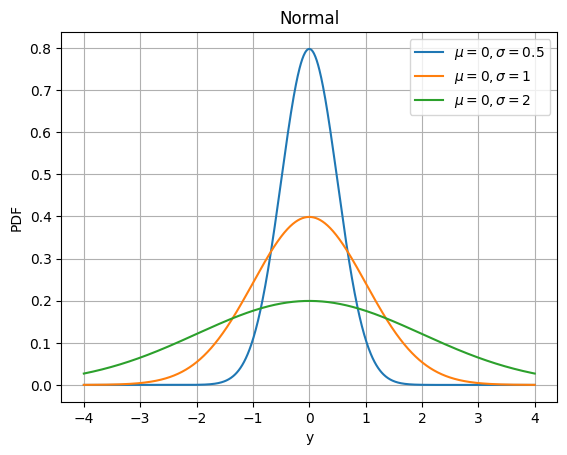

In [ ]:
y = np.linspace(-4,4,1000)
for sigma in [0.5,1,2]:
  pdf = stats.norm.pdf(y, loc=0, scale=sigma)
  plt.plot(y,pdf,label='$\mu = 0,  \sigma = {}$'.format(sigma))
plt.title('Normal')
plt.xlabel('y')
plt.ylabel('PDF')
plt.legend()
plt.grid()
plt.show()

## Binomial

- Es una distribución discreta en la cual nos imaginamos que repetimos $n$ veces un experimento de Bernoulli de forma independiente y la variable aleatoria $Y$ es el número de éxitos entre las repeticiones.
- **PMF**:

$$ f(y;p,n) =  {n \choose y} p^{y}(1-p)^{n-y} $$
- $\text{E}(Y) = np$
- $\text{var}(Y) = np(1-p)$


Para los modelos lineales nos puede servir en dos casos:
 -  Cuando tenemos una variable respuesta binaria (cualquier cosa que sea 0 o 1, presencia/ausencia, vivo/muerto) y queremos averiguar qué covariables están relacionadas con la asignación a cada clase. Asumimos que cada $Y$ viene de una distribución Binomial con $n=1$ (Bernoulli) y $P(Y=1) = p$.

$$ \Rightarrow f(y;p) =  p^{y}(1-p)^{1-y} \hspace{1cm} y\text{ }\epsilon\text{ }\{0,1 \}$$

 -  Cuando tenemos una respuesta en forma de proporciones (tasa de mortalidad, tasa de infección, porcentaje de siniestros). En estos casos los valores de $Y$ están entre 0 y 1 (o 0 y 100) y valores por fuera no tienen sentido.

 $$ \Rightarrow f(y;p,n) =  {n \choose ny} p^{ny}(1-p)^{n-ny}$$


- Cuando Y es Binomial, una función de vínculo de tipo `logit' sería apropiada (y es la canónica). *¡Voilà!* Inventamos la regresión logística.

PD: También es la distribución más conservadora cuando tenés dos eventos posibles y esperanza constante




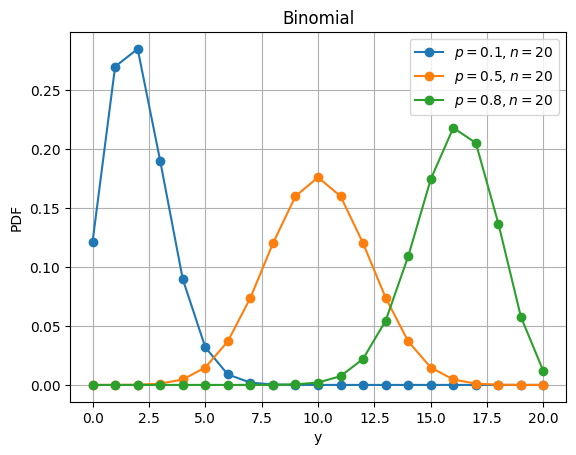

In [ ]:
n = 20
y = np.linspace(0,n,n+1)
for p in [0.1,0.5,0.8]:
  pmf = stats.binom.pmf(y, n=n,p=p)
  plt.plot(y,pmf,'o-',label='$p = {},  n = 20$'.format(p))
plt.title('Binomial')
plt.xlabel('y')
plt.ylabel('PDF')
plt.grid()
plt.legend()
plt.show()

## Poisson
-  Es una distribución que modela el número de veces que ocurre un determinado evento en un periodo fijo de tiempo.

Ejemplos:
 - Llamadas a una empresa por hora
 - Gotas en una baldosa por minuto
 - Accidentes de auto por día
 - Partículas emitidas por una fuente de radiación por segundo
 - Casos de leucemia reportados por año en cierta jurisdicción
 - (o en distancias) defectos por metro en un cable eléctrico

- **PMF**:

$$f(y;\lambda) = \frac{e^{-\lambda}\lambda^{y}}{y!} \hspace{1cm} y\text{ }\epsilon\text{ }\text{N}_0$$

con

- $\text{E}(Y) = \lambda$
- $\text{var}(Y) = \lambda$


El parámetro $\lambda$ representa la tasa/frecuencia de eventos (mientras más grande, más probabilidad de que ocurran más eventos).

- Sirve en los casos en que tengamos variables respuesta ($y$) que representan datos de conteos, o sea, números enteros no negativos donde cada evento contado es independiente de los demás y el valor límite para la cantidad de eventos que pueden ocurrir es muy muy grande (si está acotado y lo conocemos, entonces son datos proporcionales y conviene una distribución tipo binomial).

- Como necesitamos datos enteros no negativos, no sirven los modelos lineales de varianza constante y errores normales porque podríamos tener predicciones negativas de $Y$ que no significan nada. Para resolver este problema de acotación podemos usar una función de vínculo de tipo logarítmica, por ejemplo.
Tampoco funciona una distribución gaussiana porque la distribución de errores en este tipo de datos no es simétrica y la varianza aumenta a medida que aumenta la media (varianza no constante).


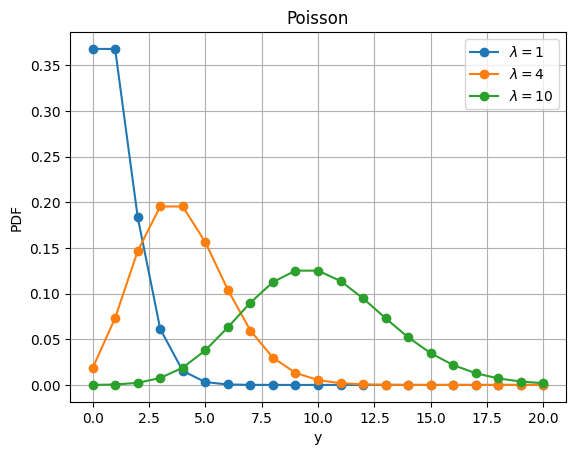

In [ ]:
n=20
y = np.linspace(0,n,n+1)
for l in [1,4,10]:
  pmf = stats.poisson.pmf(y, mu = l)
  plt.plot(y,pmf,'o-',label='$\lambda = {}$'.format(l))
plt.title('Poisson')
plt.xlabel('y')
plt.ylabel('PDF')
plt.grid()
plt.legend()
plt.show()

## Geométrica
Distribución discreta que modela el número de veces que tengo que repetir un experimento de Bernoulli hasta obtener un éxito.


- **PMF**:

$$f(y;p) = p(1-p)^{y-1}$$

con

- $\text{E}(Y) = \frac{1}{p}$
- $\text{var}(Y) = \frac{1-p}{p^2}$



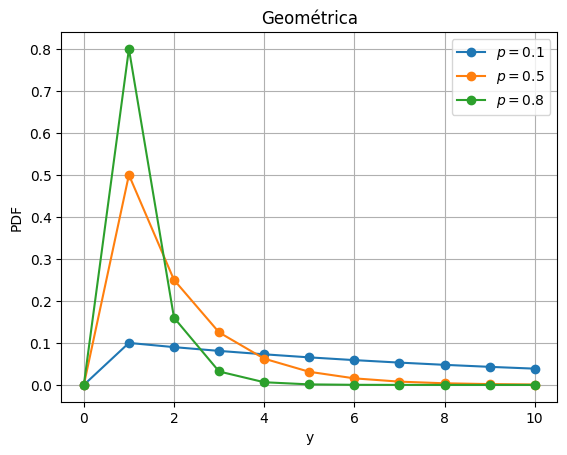

In [ ]:
n=10
y = np.linspace(0,n,n+1)
for p in [0.1,0.5,0.8]:
  pmf = stats.geom.pmf(y, p=p)
  plt.plot(y,pmf,'o-',label='$p = {}$'.format(p))
plt.title('Geométrica')
plt.xlabel('y')
plt.ylabel('PDF')
plt.grid()
plt.legend()
plt.show()

## Exponencial
Es como la geométrica pero contínua. Modela el tiempo de espera hasta la ocurrencia de un evento de Poisson. Es la distribución fundamental de duraciones o distancias respecto a un punto de referencia.
Ejemplos:
- El tiempo transcurrido entre dos llamadas
- El tiempo entre dos terremotos de una determinada magnitud
- Metros de cable hasta encontrar una falla

**PDF**:

$$f(y;\lambda) = \lambda e^{-\lambda y}  \hspace{1cm} \lambda > 0$$

donde $Y$ solo toma valores 0 o positivos, y

- $\text{E}(Y) = \frac{1}{\lambda}$ (o sea $1/\lambda$ representa el tiempo medio de espera o desplazamiento medio)
- $\text{var}(Y) = \frac{1}{\lambda^2}$

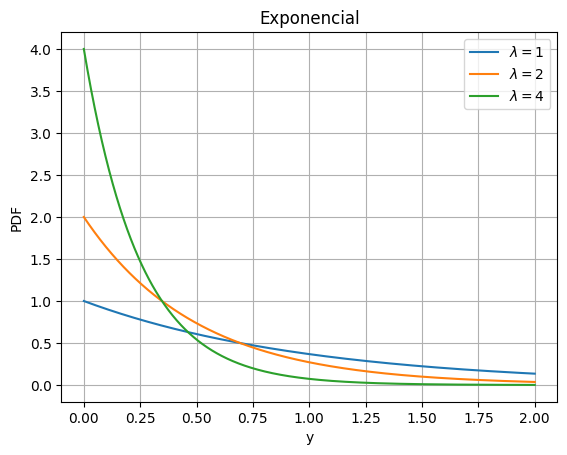

In [ ]:
y = np.linspace(0,2,1000)
for l in [1,2,4]:
  pdf = stats.expon.pdf(y, loc=0, scale=1/l)
  plt.plot(y,pdf,label='$\lambda = {}$'.format(l))
plt.title('Exponencial')
plt.xlabel('y')
plt.ylabel('PDF')
plt.legend()
plt.grid()
plt.show()

## Gamma
También para datos continuos positivos. Es una generalización de la exponencial donde se puede modelar el tiempo de espera hasta que ocurran $\alpha$ eventos.


- **PDF**:

$$f(y;\alpha,\lambda) = \frac{e^{-\lambda y}\lambda^{\alpha}y^{\alpha-1}}{\Gamma(\alpha)}  \hspace{1cm} y\text{ }\epsilon\text{ }[0,\infty) \hspace{1cm} \alpha,\lambda>0 $$

con

- $\text{E}(Y) = \frac{\alpha}{\lambda}$
- $\text{var}(Y) = \frac{\alpha}{\lambda^2}$

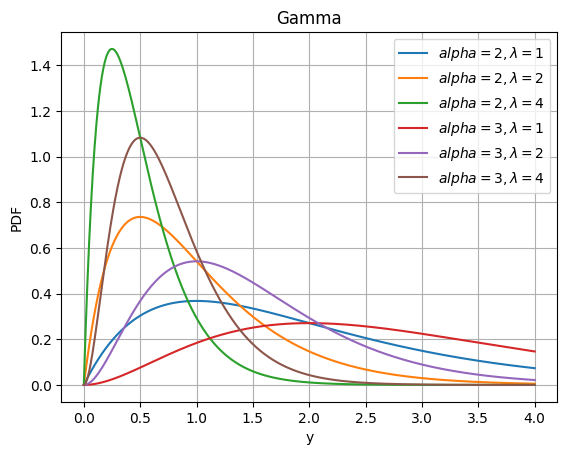

In [ ]:
alpha = 2
y = np.linspace(0,4,1000)
for a in [2,3]:
  for l in [1,2,4]:
    pdf = stats.gamma.pdf(y, a=a, scale=1/l)
    plt.plot(y,pdf,label='$alpha={}, $'.format(a)+'$\lambda = {}$'.format(l))
plt.title('Gamma')
plt.xlabel('y')
plt.ylabel('PDF')
plt.legend()
plt.grid()
plt.show()